In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the mnist dataset:

(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#checking:

print(f"Train image shape {X_train.shape}")
print(f"Train image Label {Y_train.shape}")
print(f"Test image shape {X_test.shape}")
print(f"Test image Label {Y_test.shape}")

Train image shape (60000, 28, 28)
Train image Label (60000,)
Test image shape (10000, 28, 28)
Test image Label (10000,)


In [4]:
X_train.shape

(60000, 28, 28)

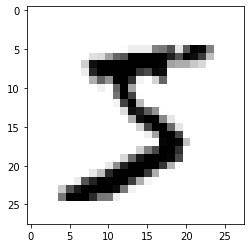

In [5]:
#seeing an image:

plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.gray_r)
plt.show()

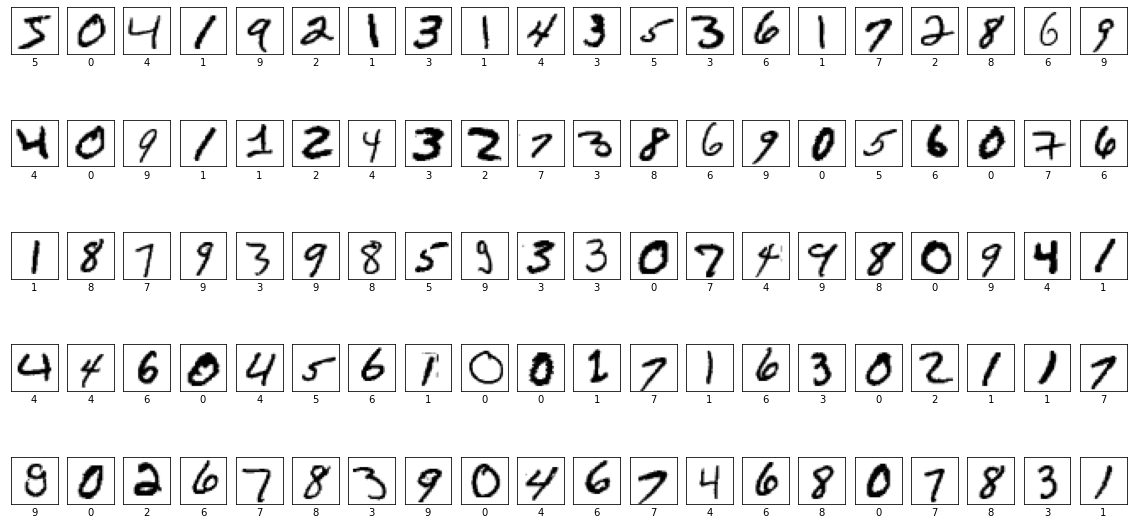

In [6]:
#Ploting the First 100 images along with the corresponding labels:

i=0
plt.figure(figsize=(20,10))

for i in range(100):
  plt.subplot(5,20,i+1)
  plt.imshow(X_train[i], cmap=plt.cm.gray_r)
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel(class_names[Y_train[i][0]])
  plt.xlabel(Y_train[i])


plt.show()

In [7]:
#image preprocessing:

X_train,X_test =X_train.astype('float32')/255,X_test.astype('float32')/255

In [8]:
#building the model:
#for Adam:

modeladam=tf.keras.Sequential ([ 
     tf.keras.Input(shape=(28,28)),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=64, activation='relu'),
     tf.keras.layers.Dense(units=32, activation='relu'),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')

])
modeladam.summary()
print("\n -------------x-------------\n")
#for SGD:

modelsgd=tf.keras.Sequential ([ 
     tf.keras.Input(shape=(28,28)),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=64, activation='relu'),
     tf.keras.layers.Dense(units=32, activation='relu'),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')

])
modelsgd.summary()

print("\n -------------x-------------\n")
#for  RSMProp:

modelrmsprop=tf.keras.Sequential ([ 
     tf.keras.Input(shape=(28,28)),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=64, activation='relu'),
     tf.keras.layers.Dense(units=32, activation='relu'),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')

])
modelrmsprop.summary()
print("\n -------------x-------------\n")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________

 -------------x-------------

Model: "sequential_1"
_________________________________________________________________

In [9]:
#compile:

modeladam.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

modelsgd.compile(
    optimizer=tf.keras.optimizers.SGD(momentum=0.9,learning_rate=0.01),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

modelrmsprop.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [10]:
#training:

h1 = modeladam.fit(x=X_train,y=Y_train, epochs=10 , validation_split=0.2 , batch_size=64)
print("\n -------------x-------------\n")
h2 = modelsgd.fit(x=X_train,y=Y_train, epochs=10 , validation_split=0.2 , batch_size=64)
print("\n -------------x-------------\n")
h3 = modelrmsprop.fit(x=X_train,y=Y_train, epochs=10 , validation_split=0.2 , batch_size=64)
print("\n -------------x-------------\n")

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.4131 - accuracy: 0.8764 - val_loss: 0.2322 - val_accuracy: 0.9299
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1763 - accuracy: 0.9482 - val_loss: 0.1570 - val_accuracy: 0.9541
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1291 - accuracy: 0.9614 - val_loss: 0.1331 - val_accuracy: 0.9592
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1046 - accuracy: 0.9676 - val_loss: 0.1187 - val_accuracy: 0.9626
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0855 - accuracy: 0.9743 - val_loss: 0.1203 - val_accuracy: 0.9638
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.1342 - val_accuracy: 0.9621
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.1115 - val_accuracy: 0.9680
Epoch 


 1. Adam Optimization Function



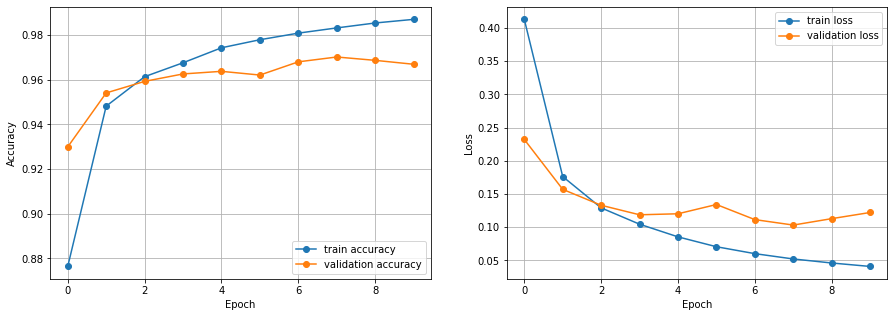

313/313 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9673


Test loss: 0.11921301484107971 Test Accuracy: 0.9672999978065491 



 2. SGD Optimization Function



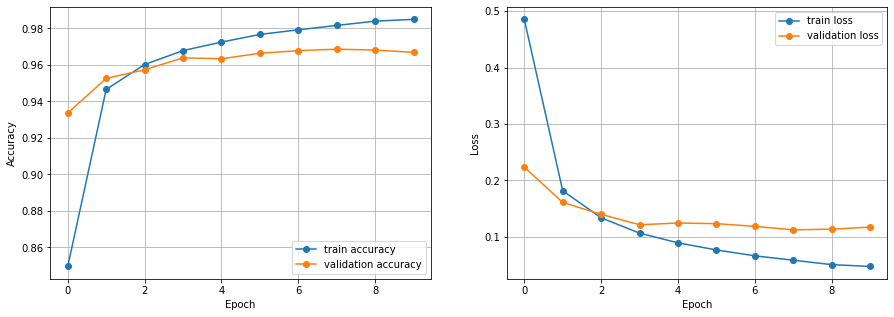

313/313 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9678


Test loss: 0.11277458816766739 Test Accuracy: 0.9678000211715698 



 3. RMSprop Optimization Function



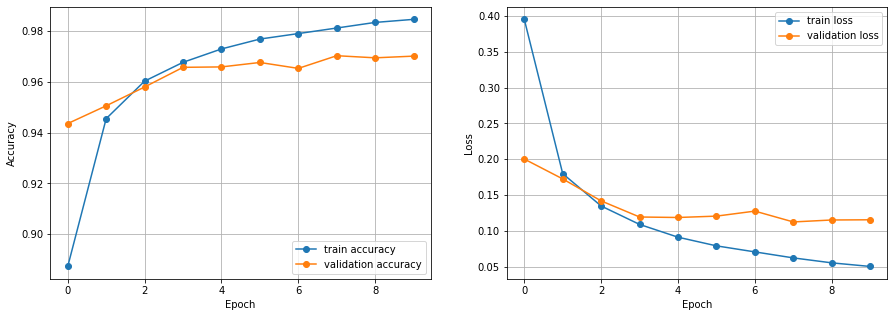

313/313 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.9717


Test loss: 0.11125949770212173 Test Accuracy: 0.9717000126838684 




In [15]:
#ploting the accuracy and loss:


print("\n 1. Adam Optimization Function\n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
test_loss, test_acc=modeladam.evaluate(X_test,Y_test)
print(f"\n\nTest loss: {test_loss} Test Accuracy: {test_acc} \n\n")


print("\n 2. SGD Optimization Function\n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
test_loss, test_acc=modelsgd.evaluate(X_test,Y_test)
print(f"\n\nTest loss: {test_loss} Test Accuracy: {test_acc} \n\n")

print("\n 3. RMSprop Optimization Function\n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
test_loss, test_acc=modelrmsprop.evaluate(X_test,Y_test)
print(f"\n\nTest loss: {test_loss} Test Accuracy: {test_acc} \n\n")

In [21]:
predictions=modelrmsprop.predict(X_test) #using RMSprop activation function
predictions[0]


array([1.3597429e-05, 1.2180487e-07, 7.8232057e-05, 3.2171196e-05,
       2.3163015e-10, 1.5118824e-09, 4.5473951e-11, 9.9984694e-01,
       3.1076670e-08, 2.8949122e-05], dtype=float32)

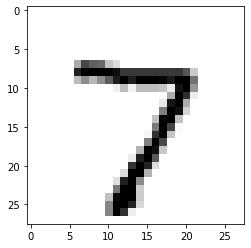

In [23]:
plt.figure()
plt.imshow(X_test[0], cmap=plt.cm.gray_r)
plt.show()

In [22]:
np.argmax(predictions[0])

7